## Access file from drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
df = df.rename(columns={'Class': 'Fraud'})

print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Fraud'],
      dtype='object')


## Imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

import pprint
from pprint import pprint

## Understand your data

In [9]:
#Printing out the first lines for an overview
fraud = df.loc[df['Fraud'] == 1]
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Determine number of fraud cases in dataset
fraud = df[df['Fraud'] == 1]
valid = df[df['Fraud'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Fraud'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Fraud'] == 0])))

print('Amount details of the fraudulent transaction')
fraud.Amount.describe()

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315
Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
print("Skewness: %f" %df['Amount'].skew())
print("Kurtosis: %f" %df['Amount'].kurt())

Skewness: 16.977724
Kurtosis: 845.092646


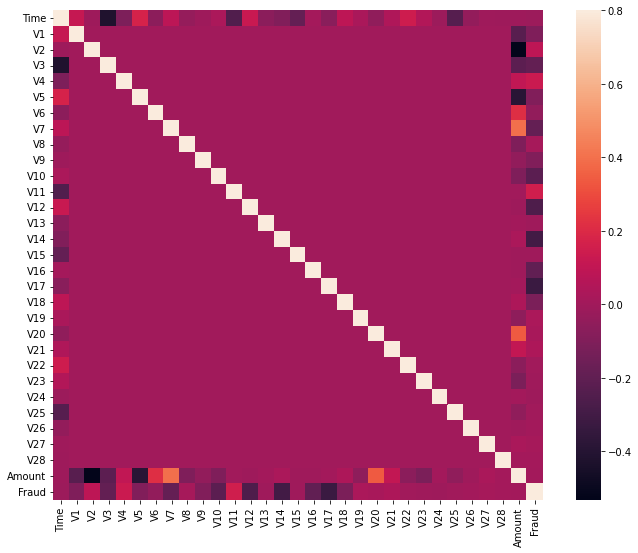

In [ ]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

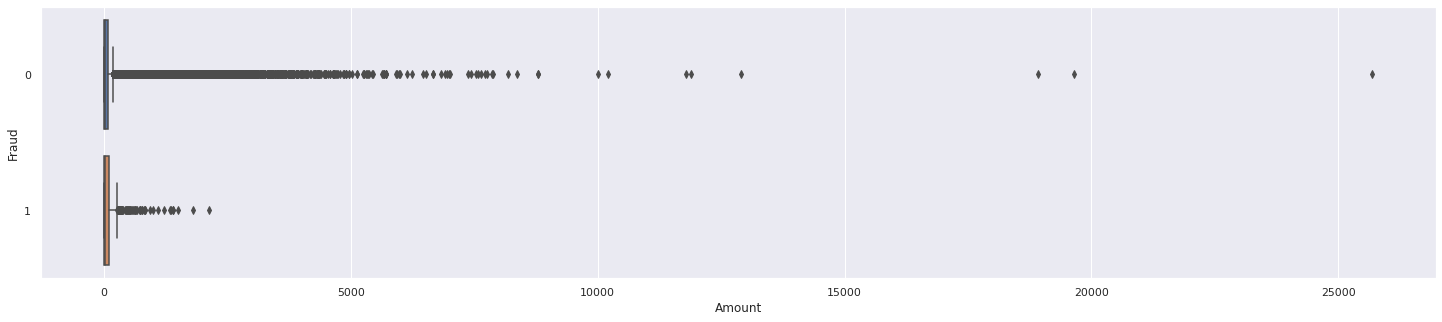

In [ ]:
sns.set(rc={'figure.figsize':(25,5)})
df['Fraud'] = df['Fraud'].astype(str)
sns.boxplot(data = df, x = "Amount", y = "Fraud", showfliers = True)
#sns.boxplot(data = fraud, x = "Amount", showfliers = False)

#sns.boxplot(fraud["Amount"], x = "Amount", showfliers = False)

#sns.boxplot(data=df[["Amount"]], x="Amount", hue="Class")

In [11]:
from sklearn.preprocessing import StandardScaler

## Training Model

In [6]:
df['Fraud'] = df['Fraud'].astype(int)

X = df.drop(['Fraud'], axis = 1)
Y = df["Fraud"]

xData = X.values
yData = Y.values

## Establish pipeline

In [12]:
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

pipe = Pipeline([('standardScaler', StandardScaler()), ('quantiletransformer', QuantileTransformer()), ('svc', SVC())])

In [13]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape 
#NumPy arrays have an attribute called shape that returns a tuple with each index having the number of corresponding elements.


((227845, 30), (56962, 30), (227845,), (56962,))

In [14]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
scores = (cross_val_score(pipe, xTrain, yTrain, cv=cv))
#Random permutation cross-validator


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_pspp = [{
    'svc__C': [1.0, 2.0, 4.0]
    kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’}
}]

grid_search_pspp = GridSearchCV(pipe, param_grid_pspp, cv=5,
                                scoring= 'recall', verbose=2, n_jobs=-1)
grid_search_pspp.fit(xTrain, yTrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardScaler', StandardScaler()),
                                       ('quantiletransformer',
                                        QuantileTransformer()),
                                       ('svc', SVC())]),
             n_jobs=-1, param_grid=[{'svc__C': [1.0, 2.0, 4.0]}],
             scoring='accuracy', verbose=2)

In [ ]:
dir(grid_search_pspp)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [ ]:
grid_search_pspp.cv_results_

{'mean_fit_time': array([68.46996093, 66.60829716, 62.52179394]),
 'std_fit_time': array([2.98548352, 3.05486197, 7.86428137]),
 'mean_score_time': array([7.61023192, 7.41500444, 6.61845961]),
 'std_score_time': array([0.23736554, 0.2563749 , 0.9354621 ]),
 'param_svc__C': masked_array(data=[1.0, 2.0, 4.0],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__C': 1.0}, {'svc__C': 2.0}, {'svc__C': 4.0}],
 'split0_test_score': array([0.99938555, 0.99949527, 0.99951722]),
 'split1_test_score': array([0.9993636 , 0.99931971, 0.99942944]),
 'split2_test_score': array([0.99938555, 0.99945138, 0.99947333]),
 'split3_test_score': array([0.99938555, 0.99949527, 0.99949527]),
 'split4_test_score': array([0.99940749, 0.99942944, 0.99960499]),
 'mean_test_score': array([0.99938555, 0.99943821, 0.99950405]),
 'std_test_score': array([1.38790742e-05, 6.45041079e-05, 5.82259833e-05]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

In [ ]:
pprint(grid_search_pspp.best_estimator_)

Pipeline(steps=[('standardScaler', StandardScaler()),
                ('quantiletransformer', QuantileTransformer()),
                ('svc', SVC(C=4.0))])


In [ ]:
#data for pipe
print("%0.9f recall with a standard deviation of %0.9f" % (scores.mean(), scores.std()))

0.999429441 accuracy with a standard deviation of 0.000051517


In [ ]:
#data for pipe1 was too lazy to do the cross validation again
print("%0.9f recall with a standard deviation of %0.9f" % (scores.mean(), scores.std()))

0.999429441 accuracy with a standard deviation of 0.000051517


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_pspp = [{
    'svc__C': [1.0, 2.0, 4.0],
    'svc__kernel': ["linear", "poly", "rbf", "sigmoid"]
}]

grid_search_pspp = GridSearchCV(pipe, param_grid_pspp, cv=5,
                                scoring= 'recall', verbose=2, n_jobs=-1)
grid_search_pspp.fit(xTrain, yTrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardScaler', StandardScaler()),
                                       ('quantiletransformer',
                                        QuantileTransformer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [1.0, 2.0, 4.0],
                          'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='accuracy', verbose=2)

In [ ]:
dir(grid_search_pspp)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_select_best_index',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_

In [ ]:
pprint(grid_search_pspp.cv_results_)

{'mean_fit_time': array([13.94752588, 53.56336532, 73.63170033, 21.29242043, 15.86471505,
       67.59862475, 71.54141326, 18.83345442, 22.1327415 , 74.26491241,
       71.64968977, 15.68226337]),
 'mean_score_time': array([1.35515289, 2.36057911, 7.45056038, 3.33108549, 1.58656468,
       2.75577283, 7.35079436, 3.27405205, 1.60465107, 2.38891578,
       7.00362029, 3.07764931]),
 'mean_test_score': array([0.9993636 , 0.99941188, 0.99938994, 0.99837609, 0.9993636 ,
       0.99939433, 0.99943821, 0.99830148, 0.9993636 , 0.99935921,
       0.99950405, 0.99836731]),
 'param_svc__C': masked_array(data=[1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0,
                   4.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object),
 'param_svc__kernel': masked_array(data=['linear', 'poly', 'rbf', 'sigmoid', 'linear', 'poly',
                   'rbf', 'sigmoid', 'linear'

In [ ]:
pprint(grid_search_pspp.best_estimator_)

Pipeline(steps=[('standardScaler', StandardScaler()),
                ('quantiletransformer', QuantileTransformer()),
                ('svc', SVC(C=4.0))])


In [ ]:
#data for pipe
print("%0.9f recall with a standard deviation of %0.9f" % (scores.mean(), scores.std()))

0.999429441 accuracy with a standard deviation of 0.000051517


In [ ]:
#data for pipe1 was too lazy to do the cross validation again
print("%0.9f recall with a standard deviation of %0.9f" % (scores.mean(), scores.std()))

0.999429441 accuracy with a standard deviation of 0.000051517


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid_pspp = [{
    'svc__C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'svc__kernel': ["linear", "poly", "rbf", "sigmoid"]
}]

grid_search_pspp = GridSearchCV(pipe, param_grid_pspp, cv=5,
                                scoring= 'recall', verbose=2, n_jobs=-1)
grid_search_pspp.fit(xTrain, yTrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardScaler', StandardScaler()),
                                       ('quantiletransformer',
                                        QuantileTransformer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.01, 0.1, 1.0, 10.0, 100.0],
                          'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             scoring='recall', verbose=2)

In [16]:
pprint(grid_search_pspp.cv_results_)

{'mean_fit_time': array([ 17.35453649,  12.31869178,  30.42124658,  28.39508214,
        12.04103069,  30.95407715,  49.31476583,  31.06997266,
        13.43551588,  57.69935546,  76.61120701,  20.5600225 ,
        42.64459295,  81.84566307,  70.1414011 ,  15.92788711,
       319.24278646,  85.6855505 ,  57.44950929,  13.67544427]),
 'mean_score_time': array([2.44314737, 1.94538617, 6.68696032, 4.308039  , 1.51077337,
       2.80095434, 6.89732471, 4.33263865, 1.64228902, 3.03005977,
       8.34272647, 3.28951941, 1.42415199, 2.57556667, 7.22934737,
       2.6054842 , 1.726226  , 2.63493457, 5.80939651, 2.29140997]),
 'mean_test_score': array([0.75144434, 0.78945148, 0.        , 0.        , 0.78438819,
       0.78691983, 0.72862707, 0.0101915 , 0.78438819, 0.74888023,
       0.78185654, 0.37095099, 0.78438819, 0.74888023, 0.76916586,
       0.47731256, 0.78438819, 0.73102889, 0.75384615, 0.47990912]),
 'param_svc__C': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1, 1.0, 

In [ ]:
!git init

Initialized empty Git repository in /content/.git/
